In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [8]:
X_test.shape

(10000, 32, 32, 3)

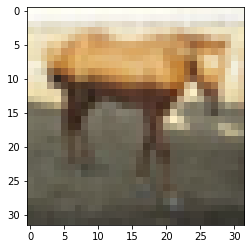

In [9]:
plt.imshow(X_train[2000])

C:\Users\Lenovo\anaconda\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


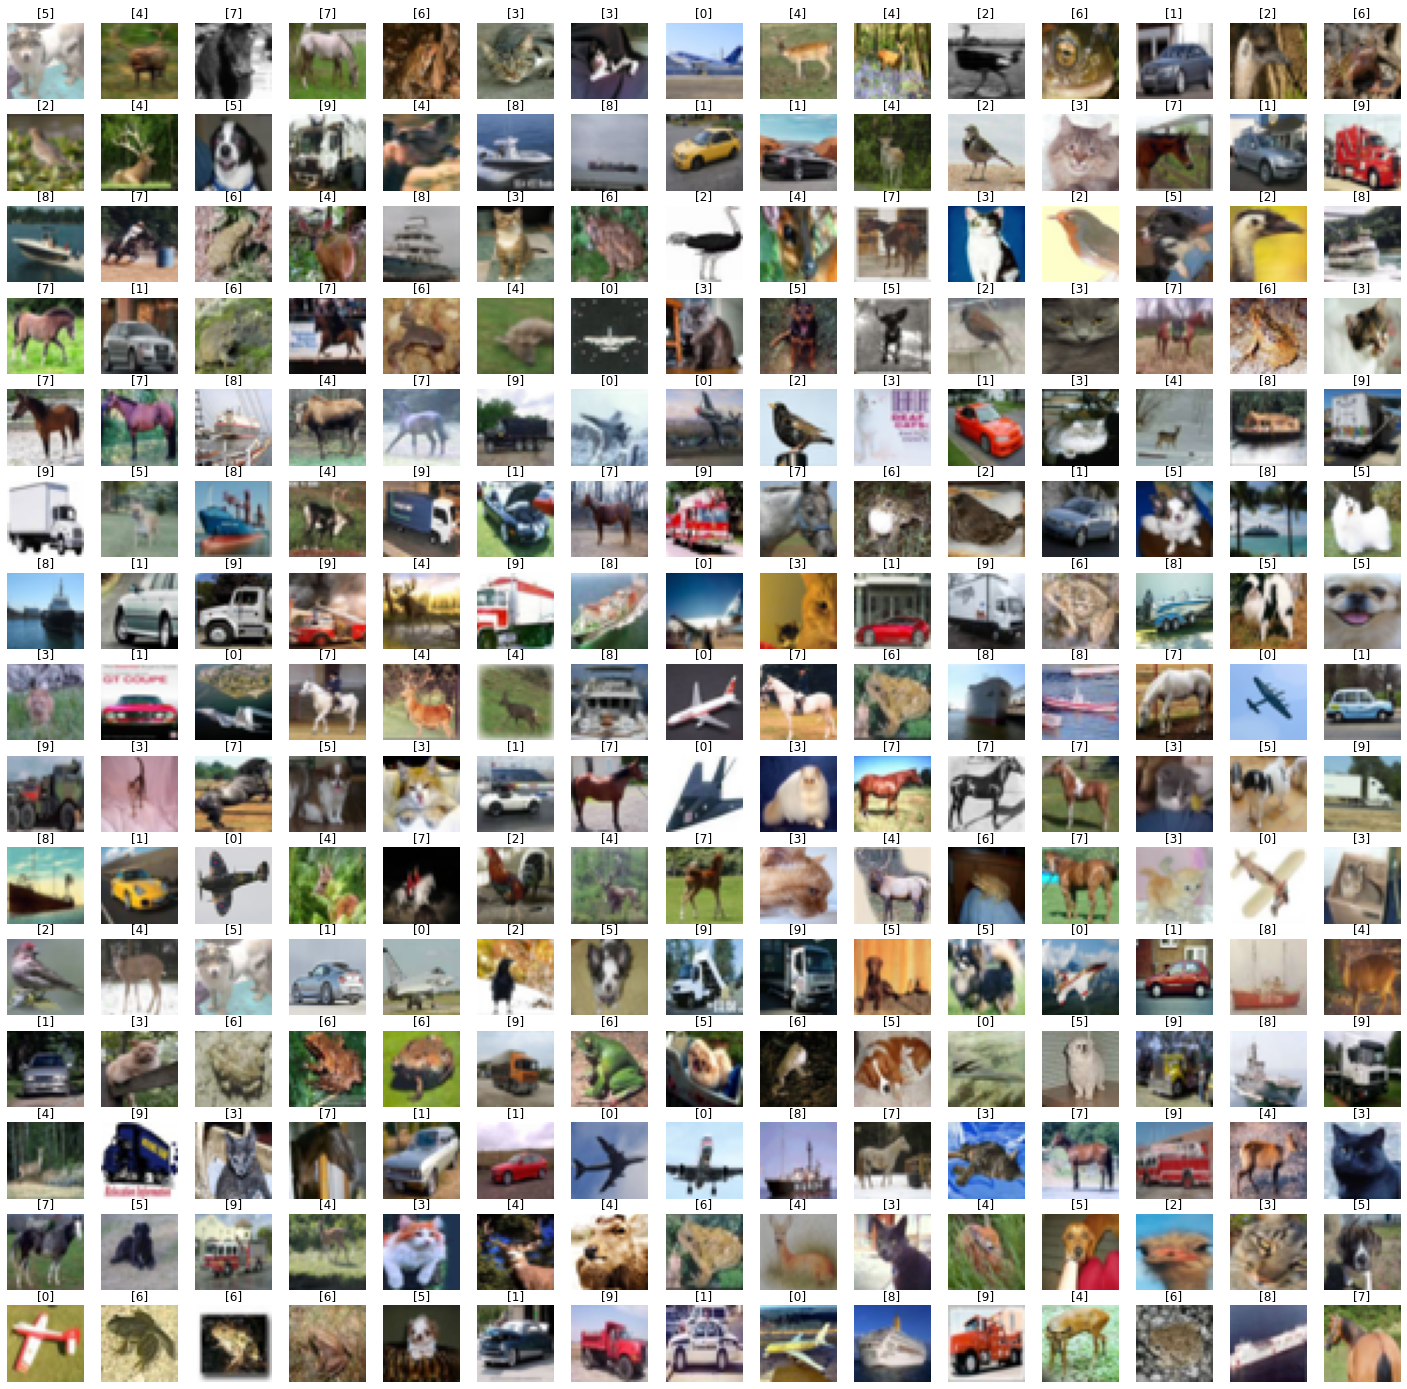

In [10]:
length=15
width=15
fig,axes=plt.subplots(length,width,figsize=(25,25))
axes=axes.ravel()


for i in np.arange(0 , length* width):
    rand_i=np.random.randint(0,len(y_train)) #random dumber 
    axes[i].imshow(X_train[rand_i])
    axes[i].set_title(y_train[rand_i])
    axes[i].axis('off')


In [11]:
# f,a=plt.subplots(length,width,figsize=(25,25) )
# a=a.ravel()

In [8]:
# convert X_train and y_train data from int to flot
X_train=X_train.astype("float32")
y_train=y_train.astype("float32")


In [9]:
# convert y_train and y_test data into binary 
import keras
y_train=keras.utils.to_categorical(y_train,10)


In [10]:
y_test=keras.utils.to_categorical(y_test,10)

In [11]:
# convert data from 0 - 255 to 0 - 1
# since data will be in points therefor we converted from data from into to float
X_train=X_train/255 

In [12]:
X_test=X_test/255

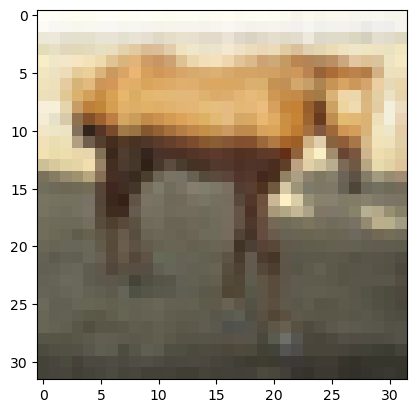

In [13]:
plt.imshow(X_train[2000])

In [14]:
X_train.shape
Input_shape=X_train.shape[1:]
Input_shape

(32, 32, 3)

# Training model

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense,Flatten, Dropout 
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [16]:
cnn=Sequential()

In [17]:
cnn.add(Conv2D(filters=64,kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn.add(Conv2D(filters=64,kernel_size= (3,3) ,activation= "relu" ))
cnn.add(AveragePooling2D(2,2))
cnn.add(Dropout(0.3))

cnn.add(Conv2D(filters=64,kernel_size = (3,3), activation = 'relu' ))
cnn.add(Conv2D(filters=64,kernel_size= (3,3) ,activation= "relu" ))
cnn.add(AveragePooling2D(2,2))
cnn.add(Dropout(0.2))



# now we flaten the data
cnn.add(Flatten())
cnn.add(Dense(units=1024,activation = 'relu')) 
cnn.add(Dense(units=1024,activation='relu'))
cnn.add(Dense(units=10 ,activation="softmax"))#since the output is in 10 catogeries 


In [18]:
cnn.compile(loss ='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(lr= 0.001), metrics = ['accuracy'])


C:\Users\Lenovo\anaconda\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [19]:
history = cnn.fit(X_train, y_train, batch_size = 32, epochs = 2 , shuffle = True )

Epoch 1/2
1563/1563 [==============================] - 167s 106ms/step - loss: 1.6058 - accuracy: 0.4241
Epoch 2/2
1563/1563 [==============================] - 164s 105ms/step - loss: 1.2025 - accuracy: 0.5810


In [20]:
evaluation=cnn.evaluate(X_test, y_test)

313/313 [==============================] - 8s 24ms/step - loss: 1.0295 - accuracy: 0.6399


In [21]:
print(f"accuracy test evalutaion score {evaluation[1]}")

accuracy test evalutaion score 0.6399000287055969


In [22]:
prediction=cnn.predict(X_test)

313/313 [==============================] - 7s 21ms/step


In [23]:
# y_test=y_test.argmax(1)
original_y_train = np.unravel_index(np.argmax(y_train, axis=1), y_train.shape)

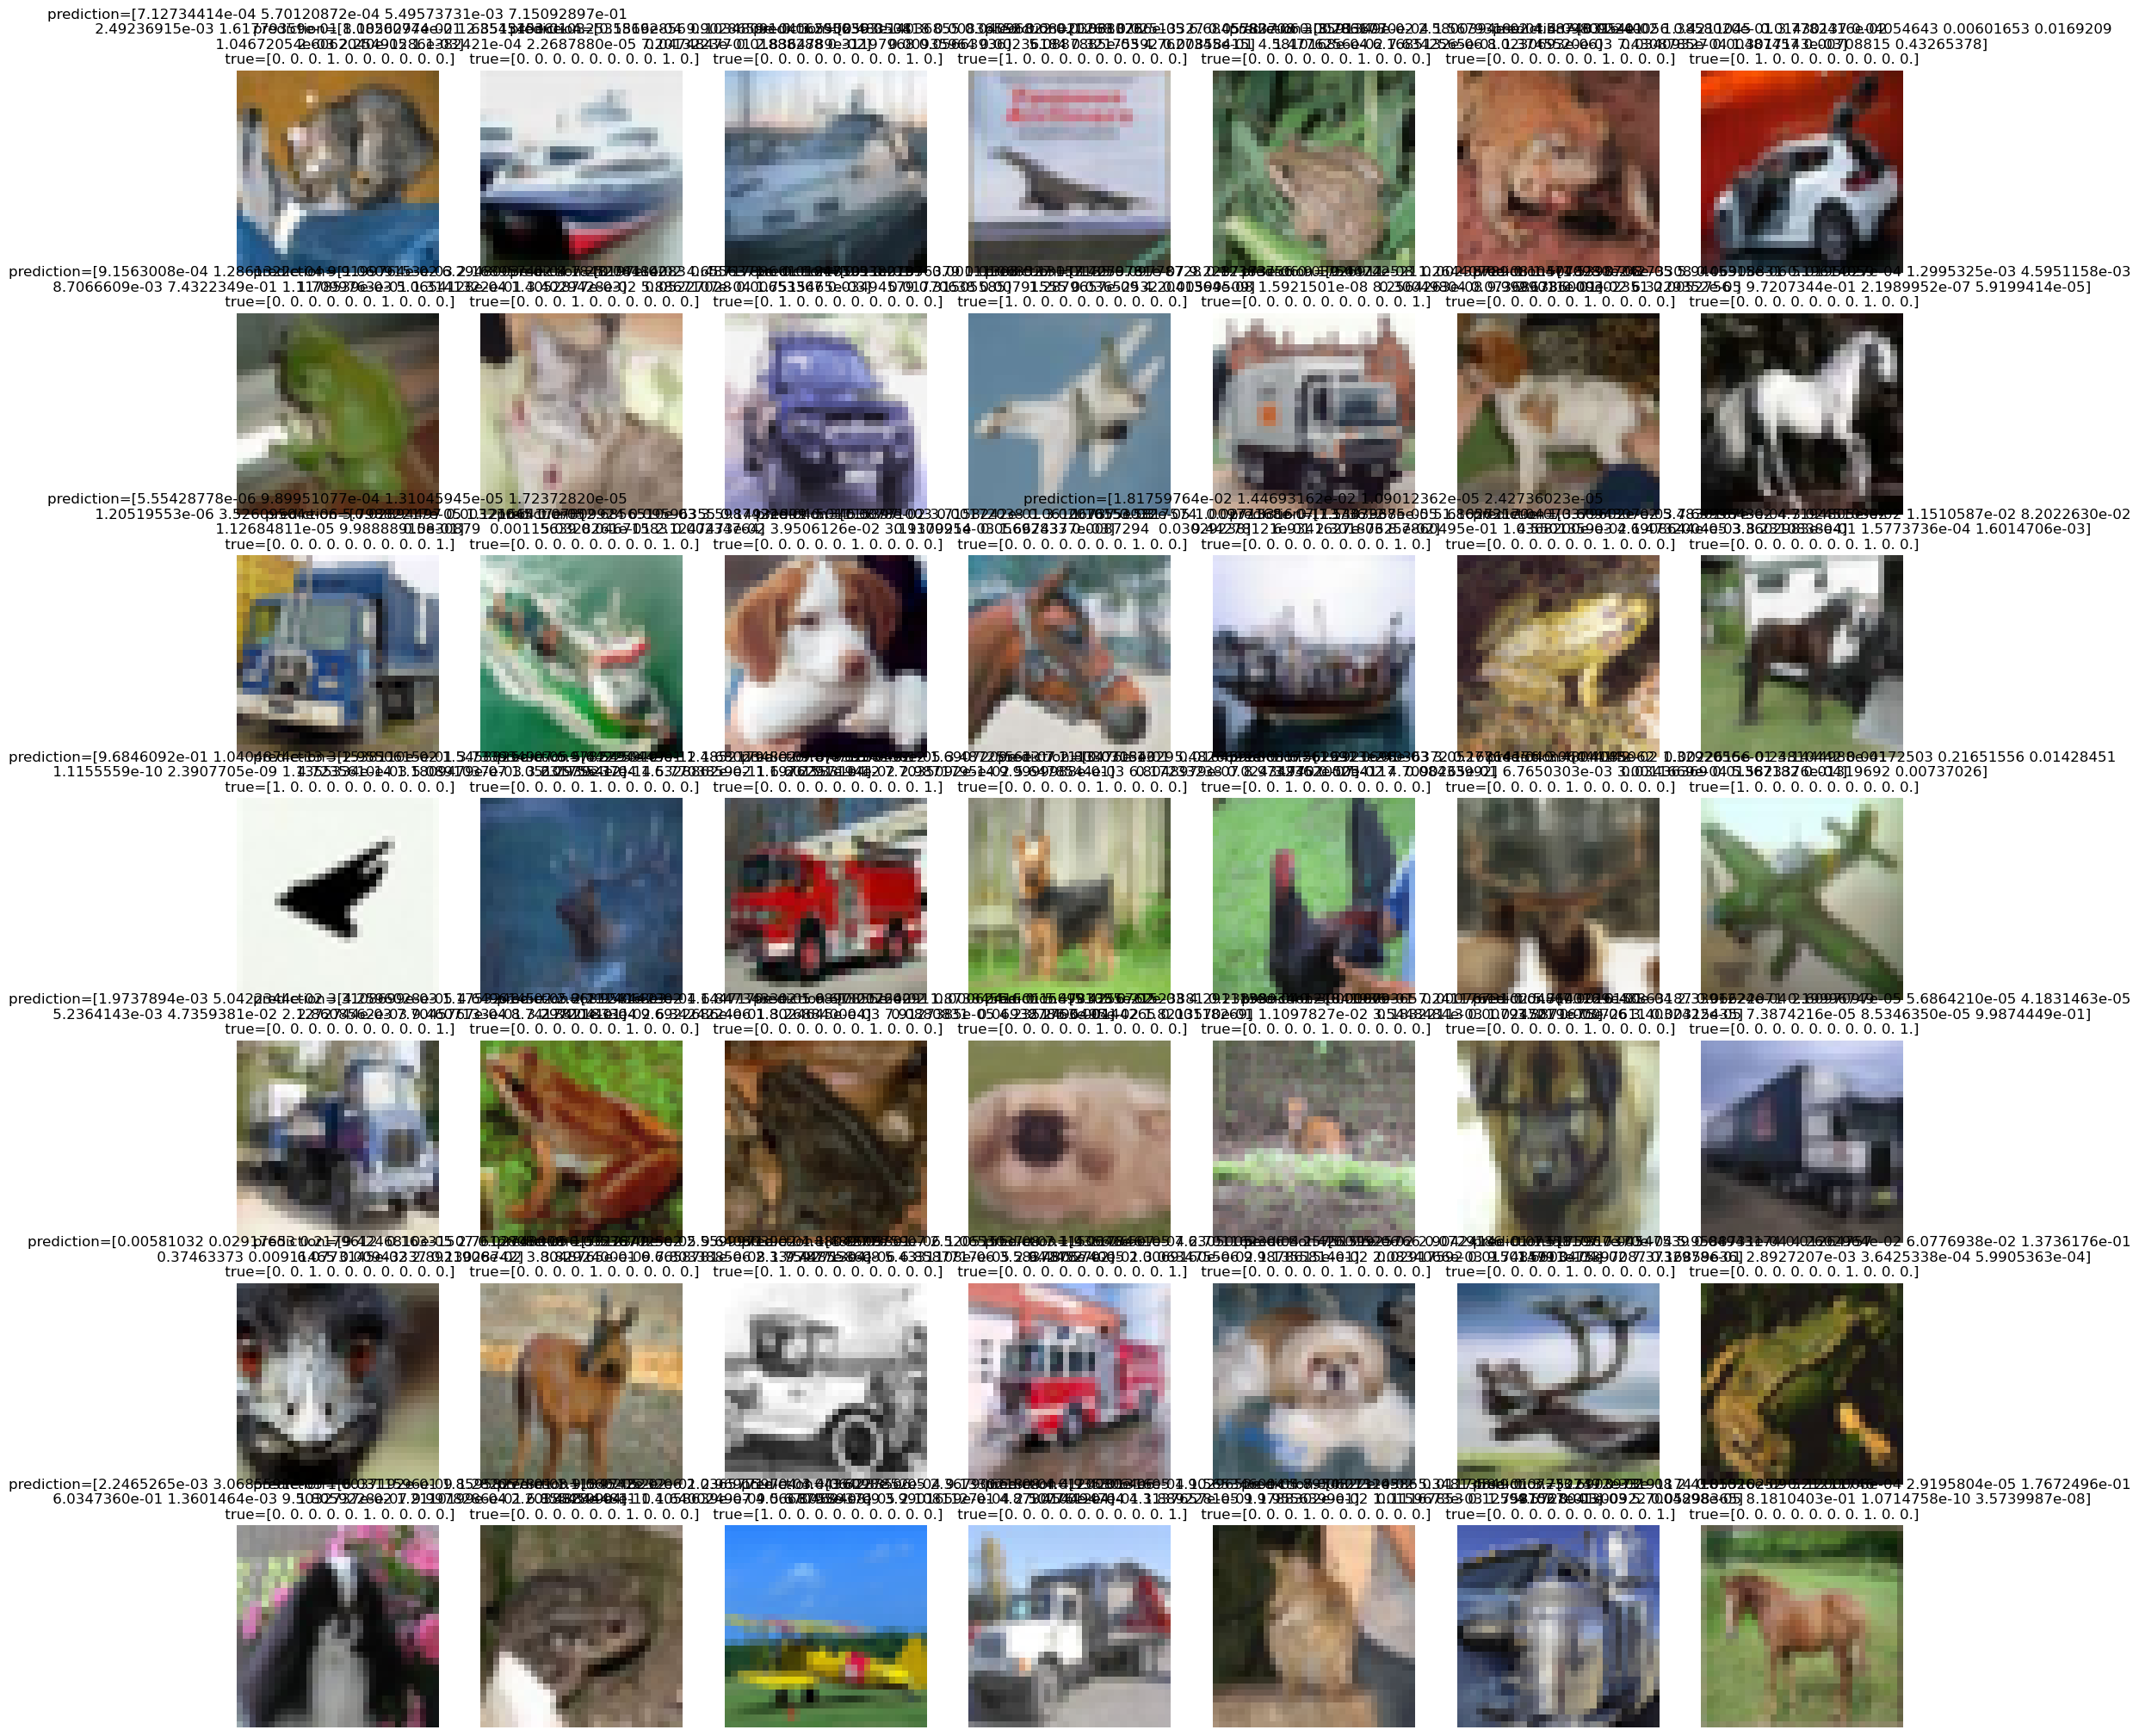

In [24]:
length=7
width=7
fig,axes=plt.subplots(length,width,figsize=(25,25))
axes=axes.ravel()


for i in np.arange(0 , length* width):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"prediction={prediction[i]}\n true={y_test[i]}")
    axes[i].axis('off')


AttributeError: 'AxesImage' object has no attribute 'set_title'

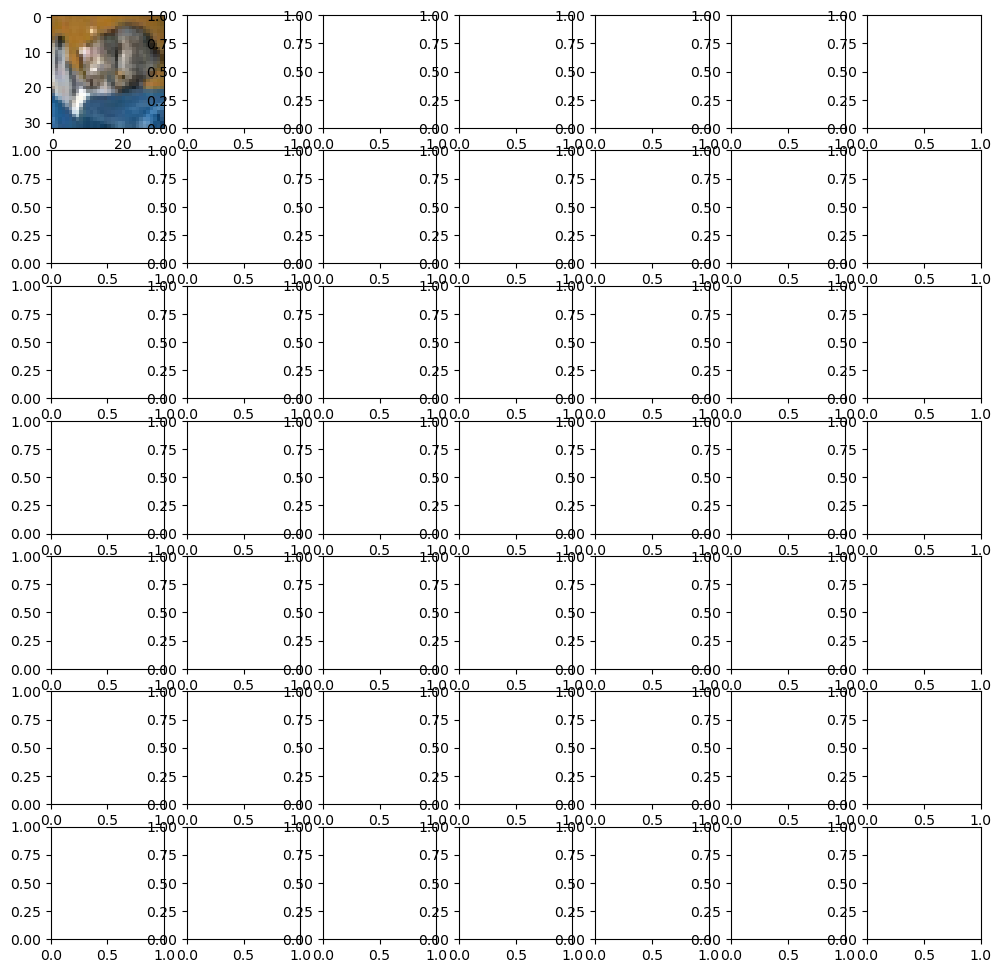

In [25]:
l=7
w=7
f,a=plt.subplots(l,w,figsize=(12,12))

a=a.ravel()

for i in np.arange(0,l*w):
    a[i]=a[i].imshow(X_test[i])
    a[i]=a[i].set_title(f"prediction={prediction[i]}\n true={y_test[i]}")

    

In [ ]:
# np.random.rand(0,5000)

In [26]:
X_test[i]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0